In [1]:
# Imports
# You will probably need to install Tensorflow & Keras
# Note: TensorFlow & Numpy often have version mismatches & 
#       you may need to roll back your Numpy version
import os
import sys

import sklearn
import scipy.io as scipy
import numpy as np
import matplotlib.image as mpimg
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, Sequential
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from skimage.transform import resize

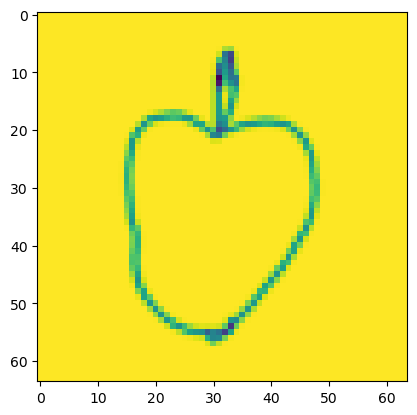

In [2]:
def load_images_from_folder(root_folder, target_size=(32,32,1)):
    images = []
    labels = []
    
    for class_folder in os.listdir(root_folder):
        class_folder_path = os.path.join(root_folder, class_folder)
        if os.path.isdir(class_folder_path):
            for image_name in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_name)
                try:
                    img = mpimg.imread(image_path)
                    img = resize(img, target_size)
                    img_array = np.array(img)
                    images.append(img_array)
                    labels.append(class_folder)  # Use folder name as label
                except Exception as e:
                    print(f"Error loading image {image_path}: {str(e)}")

    return np.array(images), np.array(labels)
    
path = "D:\Documents\CSE\CSE404\JupyterNotebooks\data"
data = load_images_from_folder(path, (64,64,1))
plt.imshow(data[0][0])

In [3]:
def classify_labels(labels):
    new_labels = []
    # Initialize an empty dictionary
    object_dict = {}
    
    # Open the file and read its contents
    with open("D:\Documents\CSE\CSE404\JupyterNotebooks\map_id_label.txt", "r") as file:
        # Iterate over each line in the file
        for line in file:
            # Split the line based on the comma delimiter
            parts = line.strip().split(",")
            # Extract the key and value from the split parts
            value = int(parts[0])  # Convert the key to integer
            key = parts[1]
            # Add the key-value pair to the dictionary
            object_dict[key] = int(value) - 1

    for i, c in enumerate(labels):
        if c in object_dict:
            new_labels.append(object_dict[c])
    
    return np.array(new_labels)

images, labels = data[0], data[1]
labels = classify_labels(labels)
labels

array([ 0,  0,  0, ..., 16, 16, 16])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.20, train_size=0.80, random_state = 42)

num_classes = 17

model = models.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(64,64,1)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [5]:
history = model.fit(
  X_train, y_train,
  validation_data=(X_test, y_test),
  epochs=50
)


Epoch 1/50
34/34 [==============================] - 2s 35ms/step - loss: 2.8385 - accuracy: 0.0597 - val_loss: 2.8350 - val_accuracy: 0.0331
Epoch 2/50
34/34 [==============================] - 1s 21ms/step - loss: 2.8336 - accuracy: 0.0561 - val_loss: 2.8338 - val_accuracy: 0.0368
Epoch 3/50
34/34 [==============================] - 1s 19ms/step - loss: 2.8308 - accuracy: 0.0625 - val_loss: 2.8282 - val_accuracy: 0.0846
Epoch 4/50
34/34 [==============================] - 1s 23ms/step - loss: 2.7812 - accuracy: 0.1186 - val_loss: 2.7019 - val_accuracy: 0.1066
Epoch 5/50
34/34 [==============================] - 1s 22ms/step - loss: 2.2881 - accuracy: 0.2904 - val_loss: 1.9945 - val_accuracy: 0.3897
Epoch 6/50
34/34 [==============================] - 1s 25ms/step - loss: 1.5928 - accuracy: 0.5037 - val_loss: 1.6407 - val_accuracy: 0.5037
Epoch 7/50
34/34 [==============================] - 1s 26ms/step - loss: 1.3456 - accuracy: 0.5836 - val_loss: 1.4889 - val_accuracy: 0.5294
Epoch 8/50
34

9/9 - 0s - loss: 2.2038 - accuracy: 0.6949 - 50ms/epoch - 6ms/step
0.6948529481887817


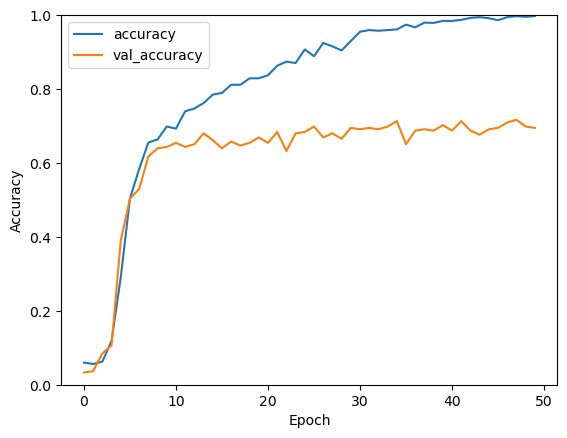

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(X_test)
y_pred_prob = tf.nn.softmax(y_pred, axis=-1)
y_pred_labels = np.argmax(y_pred_prob, axis=-1)
print("Accuracy Score: ",accuracy_score(y_test, y_pred_labels))
print("Precision Score: ",precision_score(y_test, y_pred_labels,average="micro"))
print("Recall Score: ",recall_score(y_test, y_pred_labels,average="micro"))
print("F1 Score: ",f1_score(y_test, y_pred_labels,average="micro"))

9/9 [==============================] - 0s 13ms/step
Accuracy Score:  0.6948529411764706
Precision Score:  0.6948529411764706
Recall Score:  0.6948529411764706
F1 Score:  0.6948529411764706
